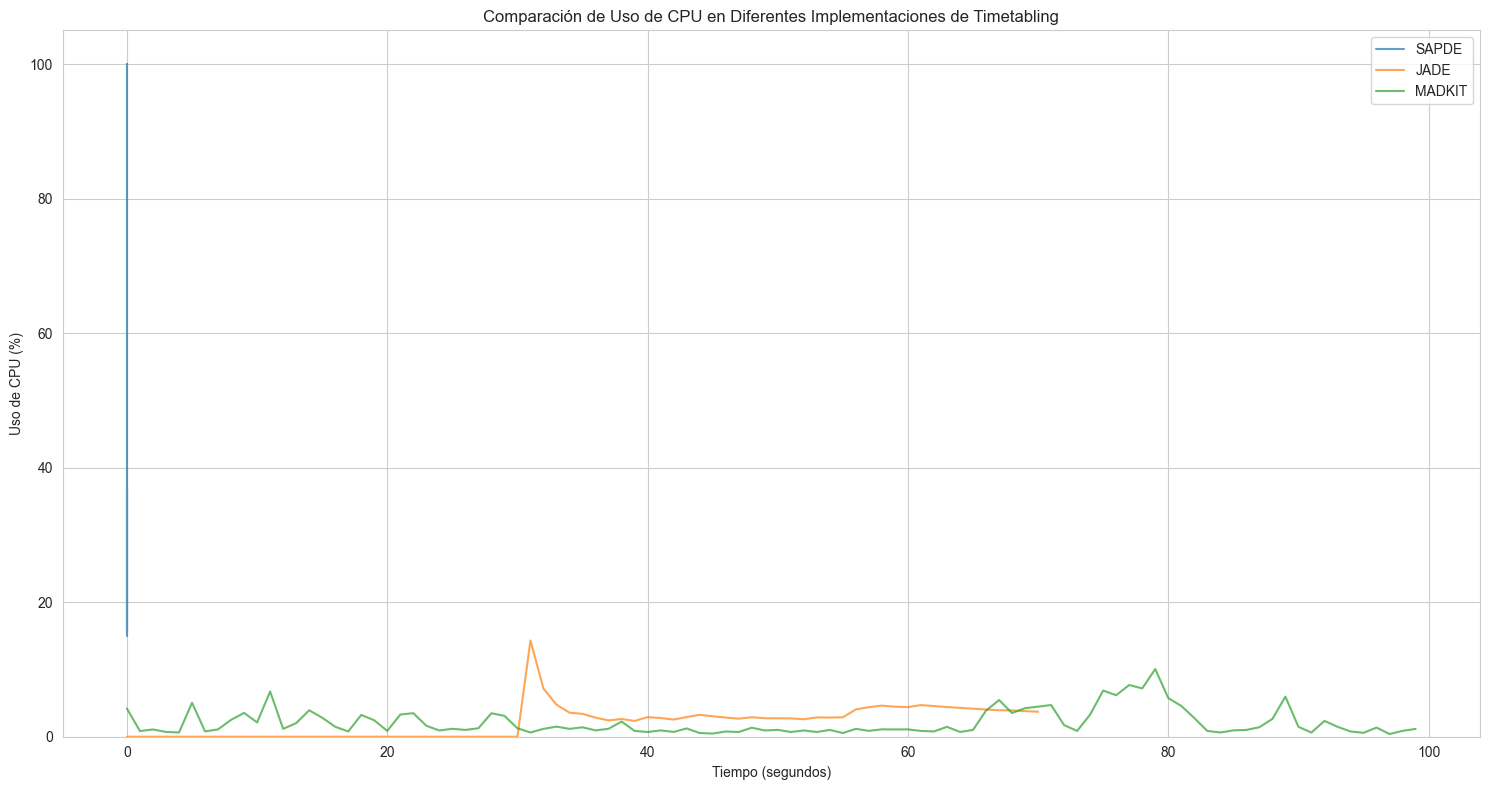


Estadísticas de uso de CPU:

SPADE:
count      8.000000
mean      31.460534
std       28.618408
min       15.000000
25%       15.869898
50%       21.214839
75%       28.693750
max      100.000000
Name: CPUUsage, dtype: float64

Jade:
count    71.000000
mean      2.144177
std       2.394836
min       0.000000
25%       0.000000
50%       2.637500
75%       3.645000
max      14.300000
Name: cpu_avg, dtype: float64

MadKit:
count    100.000000
mean       2.109100
std        1.921894
min        0.400000
25%        0.860000
50%        1.175000
75%        2.897500
max       10.060000
Name: cpu_avg, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración visual de seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Leer los archivos CSV
# Para Iteration10_cpu.csv, parseamos el timestamp como datetime
iteration10 = pd.read_csv('Iteration10_cpu.csv')
iteration10['Timestamp'] = pd.to_datetime(iteration10['Timestamp'])

# Calcular los segundos desde el inicio para Iteration10
start_time = iteration10['Timestamp'].min()
iteration10['seconds'] = (iteration10['Timestamp'] - start_time).dt.total_seconds()

# Agrupar por segundos y calcular la media del CPU
iteration10_grouped = iteration10.groupby('seconds')['CPUUsage'].mean().reset_index()

# Leer y procesar mas_metrics
mas_metrics = pd.read_csv('mas_metrics_2025.csv')
mas_metrics['seconds'] = range(len(mas_metrics))

# Leer y procesar cpu_madkit
cpu_madkit = pd.read_csv('cpu_madkit.csv')
cpu_madkit['seconds'] = cpu_madkit['sample_number'] - 1

# Crear el gráfico
plt.figure(figsize=(15, 8))

# Graficar cada dataset
plt.plot(iteration10_grouped['seconds'], iteration10_grouped['CPUUsage'], 
         label='SAPDE', alpha=0.7)
plt.plot(mas_metrics['seconds'], mas_metrics['cpu_avg'], 
         label='JADE', alpha=0.7)
plt.plot(cpu_madkit['seconds'], cpu_madkit['cpu_avg'], 
         label='MADKIT', alpha=0.7)

# Configurar el gráfico
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Uso de CPU (%)')
plt.title('Comparación de Uso de CPU en Diferentes Implementaciones de Timetabling')
plt.legend()
plt.grid(True)

# Ajustar los límites del eje Y para mejor visualización
plt.ylim(bottom=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular y mostrar estadísticas básicas
print("\nEstadísticas de uso de CPU:")
print("\nSPADE:")
print(iteration10_grouped['CPUUsage'].describe())
print("\nJade:")
print(mas_metrics['cpu_avg'].describe())
print("\nMadKit:")
print(cpu_madkit['cpu_avg'].describe())